# NSF Committee on Software Infrastructure for Heterogeneous Computing

## 2017 Survey of principal investigators

### Lorena Barba

**Analysis of Q11 - Which programming languages does your research group use? Please give a comma-separated list**

In [1]:
import numpy
import pandas
from matplotlib import pyplot
%matplotlib inline

#Import rcParams to set font styles
from matplotlib import rcParams

#Set font style and size 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

The raw data in `NSF_Software_Survey_rawdata.csv` is organized as a visual spreadsheet, not as a comma-separated-values data set. It's impossible to use this as the data file. Instead, I copied the answers to survey Q11 into a new text file—these are lines 6288 to 9334 of the spreadsheet.

Loading the text data into a list of strings, one string per line of the text, we find there are 3047 lines. Below, the first five lines are shown.

In [12]:
q11_languages_file= open('Q11-languages.txt')

In [4]:
q11_languages_text = q11_languages_file.readlines()

In [5]:
type(q11_languages_text)

list

In [6]:
len(q11_languages_text)

3047

In [7]:
q11_languages_text[0:5]

['Fortran, C++, Python, MPI, OpenMP, CUDA\n',
 'C++, Java, Perl, Python, Ruby, R\n',
 'Python 3\n',
 'Fortran, C, C++, Python, bash/sed/awk/grep\n',
 'c, c++, python\n']

Survey respondents did not follow instructions to provide a comma-separated list of languages. Many responded in full sentences (like _"Too many to list"_), others separated the language names with semicolon or slash, yet others embedded comments in parenthesis.

Using Sublime Text, I applied find-and-replace to get rid of all punctuation marks — ` , ; : ! ? ( ) / ` — replacing them by spaces. Then I re-opened the file into `q11_languages_file` (input cell `[12]` above). The text file is changed now, so I can't re-execute the cells to replicate the three outputs above—unless creating the text from the raw data all over again.

Using a Python dictionary, turn the text all into lower case (some folks write Python, others python, etc.), then split each line at the spaces, and count word values into the dictionary. Then use a list to sort by count.

In [13]:
count = {} 

for line in q11_languages_file:
    line = line.lower()
    words = line.split()
    
    for word in words:
        count[word] = count.get(word,0) + 1

In [15]:
#count

In [18]:
lang_list = []
for key, value in count.items():
    lang_list.append((value, key))

lang_list.sort(reverse = True)    
for value, key in lang_list[:10]:
    print (key, value)

python 1092
matlab 699
c++ 686
r 650
c 475
fortran 353
java 279
mathematica 147
perl 141
javascript 109


Nice. The most popular language is Python. (Showing only the first 10 list entries above.)

Now I want a pretty bar plot. What I have is a list of tuples `(language, count)`, and I want an array-like of counts. Better use a `pandas` series so `language` is the label. 

In [24]:
popular_langs = list(zip(*lang_list[:16]))

In [25]:
popular_langs

[(1092, 699, 686, 650, 475, 353, 279, 147, 141, 109, 104, 94, 82, 79, 76, 69),
 ('python',
  'matlab',
  'c++',
  'r',
  'c',
  'fortran',
  'java',
  'mathematica',
  'perl',
  'javascript',
  'stata',
  'spss',
  'idl',
  'cuda',
  'sas',
  'gaussian')]

In [27]:
lang_series = pandas.Series(popular_langs[0],popular_langs[1])

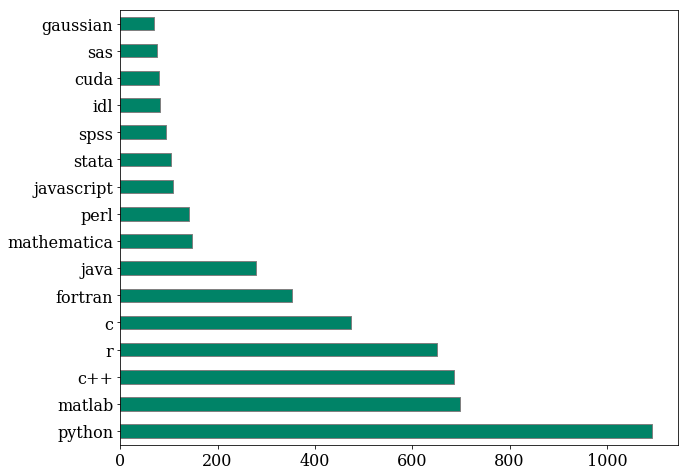

In [28]:
lang_series.plot.barh(figsize=(10,8), color='#008367', edgecolor='gray');

**Here are the top-16 programming languages mentioned by the survey respondents**

Note that irrelevant words start to appear beyond the 16th place; for example _"and"_ and _"packages"_. If someone cares, we could clean that up to look at the more infrequent languagues.